<a href="https://colab.research.google.com/github/Luco17-lco/Primera-entrega-trabajo-final/blob/main/Copia_de_ProyectoDS_ParteI_%2BCorrea.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Cargar los archivos CSV
train_df = pd.read_csv('/content/drive/MyDrive/train (1).csv')
test_df = pd.read_csv('/content/drive/MyDrive/test (1).csv')

# Mostrar las primeras filas del dataset de entrenamiento
train_df.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# Abstract

Este proyecto utiliza el dataset "House Prices - Advanced Regression Techniques" de Kaggle, que contiene información sobre precios de viviendas y diversas características relacionadas. El dataset incluye 1460 filas y 81 columnas, abarcando variables que van desde el área de construcción hasta el año de construcción y la calidad de los acabados.

El objetivo de este análisis es explorar las variables que más influyen en el precio de venta de una casa. Las preguntas de interés incluyen:

1. ¿Cuál es el impacto de la calidad de los acabados en el precio de venta?
2. ¿Cómo influye la ubicación en el precio de las viviendas?
3. ¿Existe una correlación significativa entre el tamaño de la casa y su precio?

Se generarán diversas visualizaciones univariadas, bivariadas y multivariadas para identificar patrones y relaciones entre las variables, lo que permitirá formular hipótesis más concretas y responder a las preguntas planteadas.

In [ ]:
# Verificar nombres de columnas
print(train_df.columns)

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [ ]:
# Describir las variables de interés
variables_interes = ["SalePrice", "OverallQual", "GrLivArea", "GarageCars", "YearBuilt", "LotArea"]

In [ ]:
# Verificar si las columnas existen
missing_columns = [col for col in variables_interes if col not in train_df.columns]
if len(missing_columns) > 0:
    print(f"Las siguientes columnas no existen en el DataFrame: {missing_columns}")
else:
    # Describir las variables de interés
    descripcion = train_df[variables_interes].describe()
    print(descripcion)

           SalePrice    GrLivArea    YearBuilt
count    1460.000000  1460.000000  1460.000000
mean   180921.195890  1515.463699  1971.267808
std     79442.502883   525.480383    30.202904
min     34900.000000   334.000000  1872.000000
25%    129975.000000  1129.500000  1954.000000
50%    163000.000000  1464.000000  1973.000000
75%    214000.000000  1776.750000  2000.000000
max    755000.000000  5642.000000  2010.000000


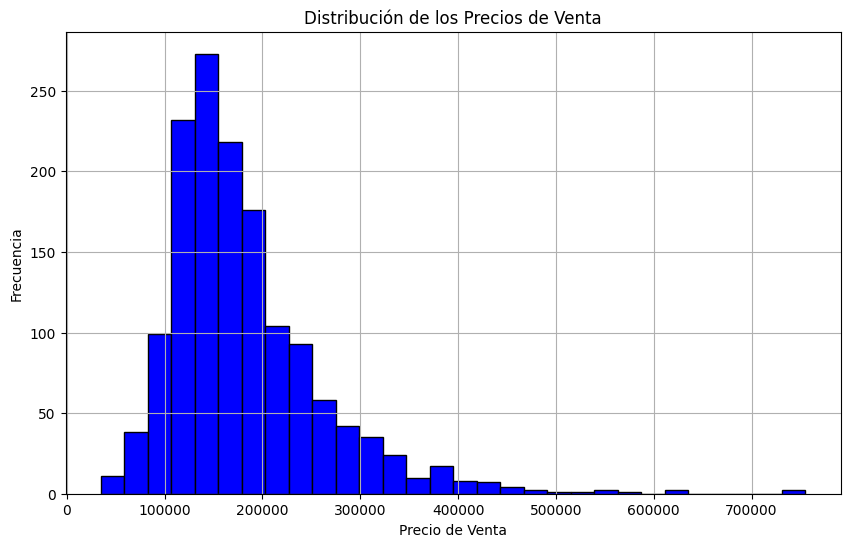

In [ ]:
import matplotlib.pyplot as plt

# Histograma del precio de venta
plt.figure(figsize=(10, 6))
plt.hist(train_df['SalePrice'], bins=30, color='blue', edgecolor='black')
plt.title('Distribución de los Precios de Venta')
plt.xlabel('Precio de Venta')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

El histograma del precio de venta muestra cómo se distribuyen los precios de las casas en el conjunto de datos. Observamos una distribución asimétrica a la derecha, lo que indica que la mayoría de las casas tienen precios de venta más bajos, aunque hay algunas casas que tienen precios muy altos. Parece que el precio medio de venta es de alrededor de $200,000.

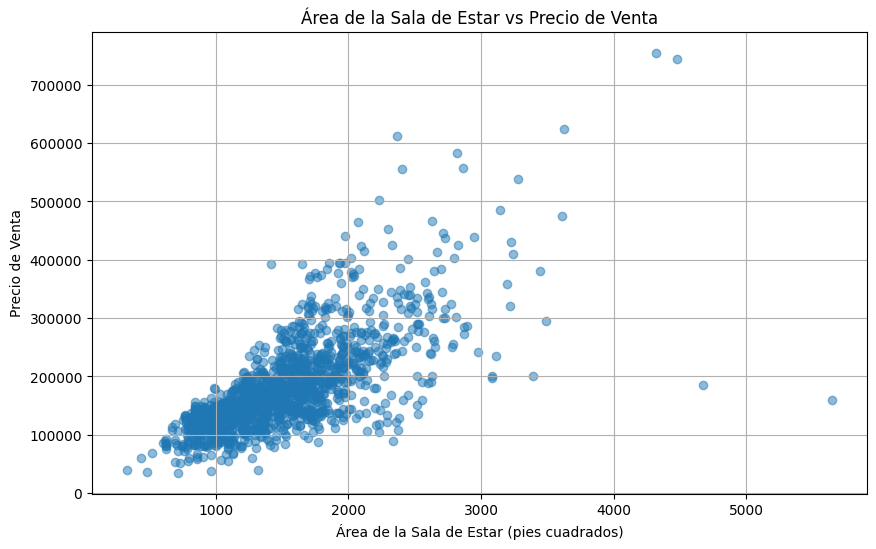

In [ ]:
# Gráfico de dispersión del área de la sala de estar vs precio de venta
plt.figure(figsize=(10, 6))
plt.scatter(train_df['GrLivArea'], train_df['SalePrice'], alpha=0.5)
plt.title('Área de la Sala de Estar vs Precio de Venta')
plt.xlabel('Área de la Sala de Estar (pies cuadrados)')
plt.ylabel('Precio de Venta')
plt.grid(True)
plt.show()

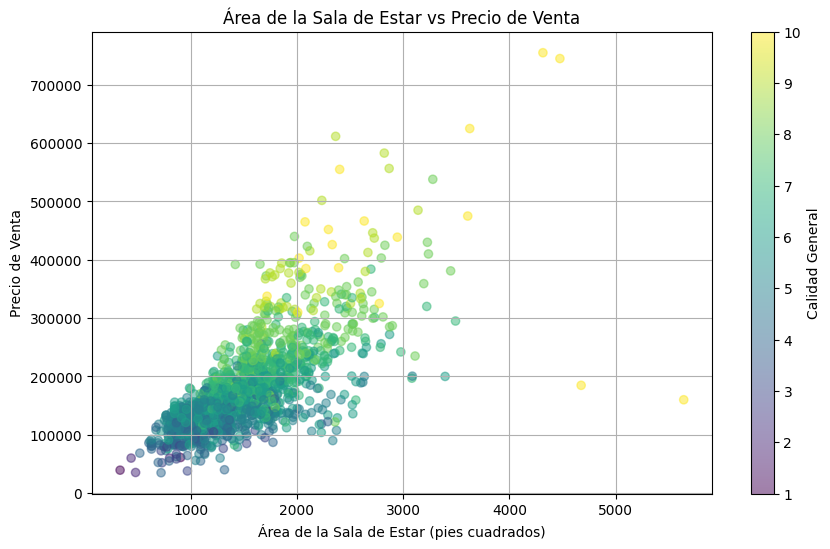

In [ ]:
# Gráfico de dispersión del área de la sala de estar vs precio de venta con colores según la calidad general
plt.figure(figsize=(10, 6))
scatter = plt.scatter(train_df['GrLivArea'], train_df['SalePrice'], c=train_df['OverallQual'], cmap='viridis', alpha=0.5)
plt.colorbar(scatter, label='Calidad General')
plt.title('Área de la Sala de Estar vs Precio de Venta')
plt.xlabel('Área de la Sala de Estar (pies cuadrados)')
plt.ylabel('Precio de Venta')
plt.grid(True)
plt.show()

Este gráfico de dispersión muestra la relación entre el área de la sala de estar y el precio de venta, con los colores representando la calidad general de la casa. Existe una correlación positiva clara: el precio de venta tiende a aumentar con el área de la sala de estar. Además, las casas de mayor calidad general, representadas por colores más claros, suelen tener precios de venta más altos y áreas de sala de estar más grandes.

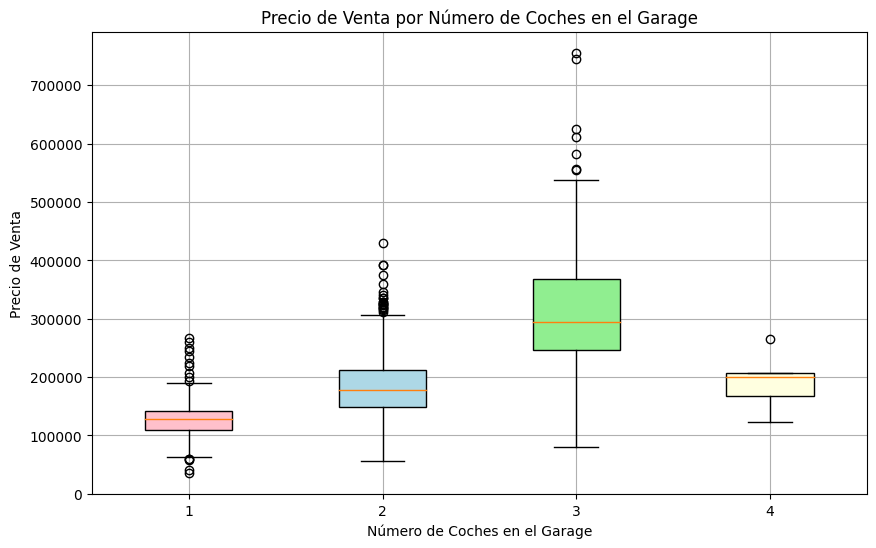

In [ ]:
import matplotlib.pyplot as plt

# Boxplot del precio de venta por número de coches en el garage
plt.figure(figsize=(10, 6))
box = plt.boxplot(
    [train_df[train_df['GarageCars'] == i]['SalePrice'] for i in range(1, 5)],
    patch_artist=True,
    labels=['1', '2', '3', '4']
)

# Colorear las cajas del boxplot
colors = ['pink', 'lightblue', 'lightgreen', 'lightyellow']
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

plt.title('Precio de Venta por Número de Coches en el Garage')
plt.xlabel('Número de Coches en el Garage')
plt.ylabel('Precio de Venta')
plt.grid(True)
plt.show()

El boxplot muestra la distribución del precio de venta según el número de coches que caben en el garage. A medida que el número de coches en el garage aumenta, también lo hace el precio de venta. Las casas con espacio para 3 coches tienden a tener los precios de venta más altos. Además, hay algunas observaciones atípicas en cada categoría, indicando variaciones significativas en los precios de venta dentro de cada grupo.

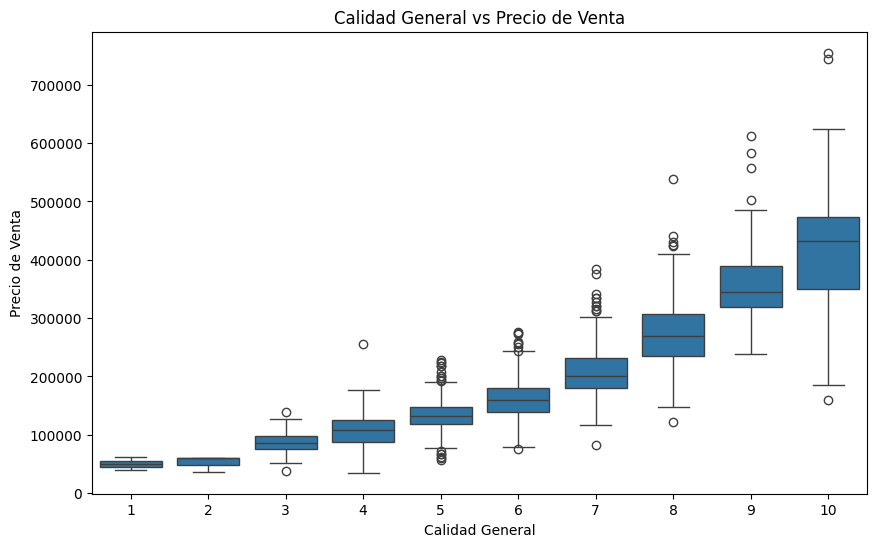

In [ ]:
import seaborn as sns

# Boxplot de la calidad general vs precio de venta
plt.figure(figsize=(10, 6))
sns.boxplot(x='OverallQual', y='SalePrice', data=train_df)
plt.title('Calidad General vs Precio de Venta')
plt.xlabel('Calidad General')
plt.ylabel('Precio de Venta')
plt.show()

Las casas con una calidad general más alta, valores de 8 a 10, tienen precios de venta significativamente más altos en comparación con las casas de menor calidad, valores de 1 a 3. Esto sugiere que la calidad general es un fuerte indicador del precio de venta.

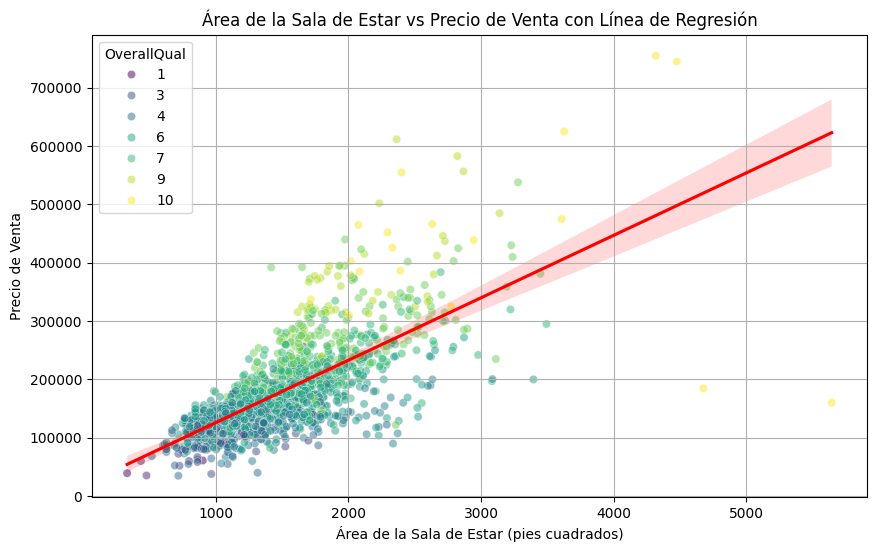

In [ ]:
# Gráfico de dispersión con línea de regresión
plt.figure(figsize=(10, 6))
sns.scatterplot(data=train_df, x='GrLivArea', y='SalePrice', hue='OverallQual', palette='viridis', alpha=0.5)
sns.regplot(data=train_df, x='GrLivArea', y='SalePrice', scatter=False, color='red')
plt.title('Área de la Sala de Estar vs Precio de Venta con Línea de Regresión')
plt.xlabel('Área de la Sala de Estar (pies cuadrados)')
plt.ylabel('Precio de Venta')
plt.grid(True)
plt.show()

Este gráfico combina un gráfico de dispersión del área de la sala de estar y el precio de venta con una línea de regresión ajustada en rojo. La línea de regresión refuerza la observación de una relación positiva entre estas dos variables: las casas con áreas de sala de estar más grandes tienden a venderse por precios más altos. Los puntos coloreados según la calidad general también muestran que las casas de mayor calidad generalmente tienen áreas de sala de estar más grandes y precios más altos.

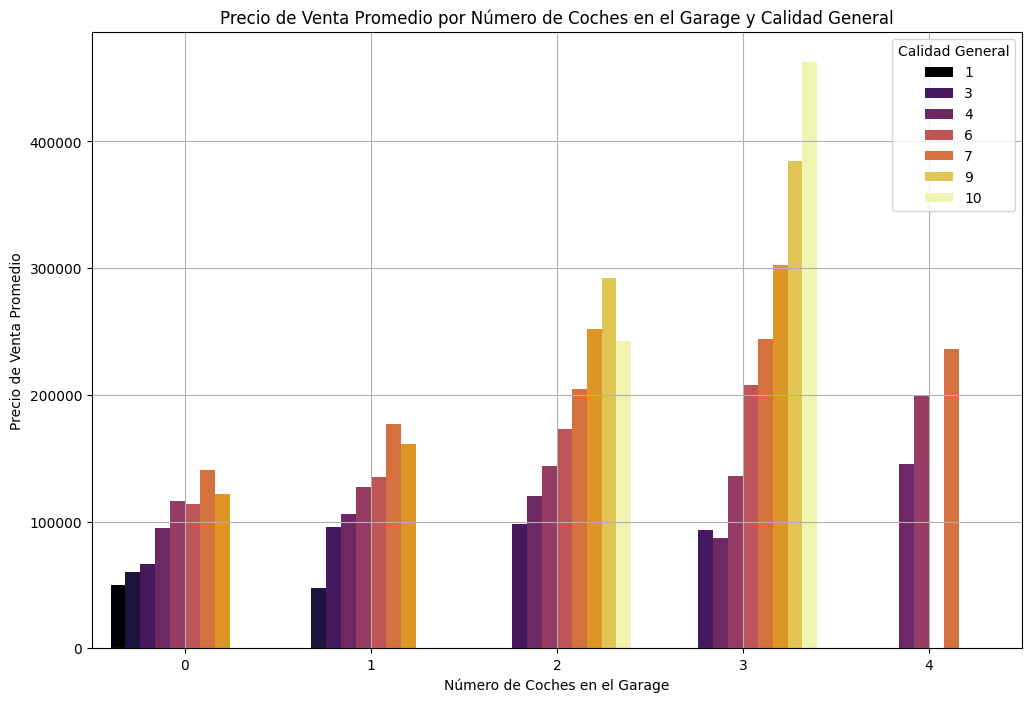

In [ ]:
# Crear una nueva columna categórica para el número de coches en el garage con un orden específico
train_df['GarageCars'] = pd.Categorical(train_df['GarageCars'], categories=['0', '1', '2', '3', '4'], ordered=True)

# Gráfico de barras del precio de venta promedio por número de coches en el garage
plt.figure(figsize=(12, 8))
sns.barplot(x='GarageCars', y='SalePrice', hue='OverallQual', data=train_df, palette='inferno', errorbar=None)
plt.title('Precio de Venta Promedio por Número de Coches en el Garage y Calidad General')
plt.xlabel('Número de Coches en el Garage')
plt.ylabel('Precio de Venta Promedio')
plt.legend(title='Calidad General')
plt.grid(True)
plt.show()

Este gráfico de barras muestra el precio de venta promedio en función del número de coches que caben en el garage y la calidad general. Los colores representan diferentes niveles de calidad general. Al igual que en el boxplot anterior, observamos que las casas con más espacio para coches tienden a tener precios de venta más altos. Además, dentro de cada categoría de garage, las casas de mayor calidad tienen precios de venta promedio más altos. Esto refuerza la importancia tanto del tamaño del garage como de la calidad general en la determinación del precio de venta.

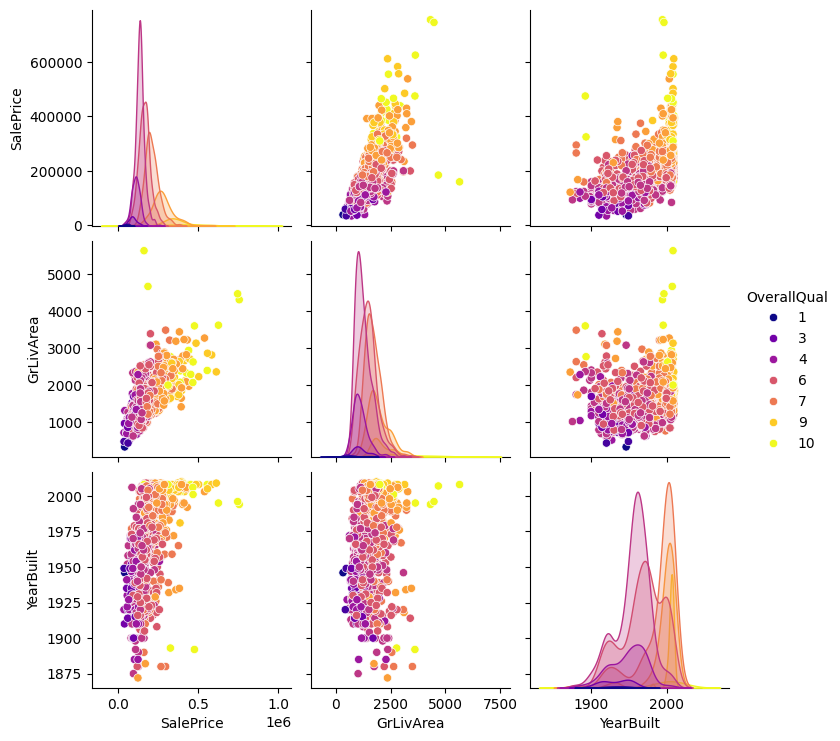

In [ ]:
# Pairplot para variables seleccionadas con colores diferenciados
variables_interes = ["SalePrice", "GrLivArea", "YearBuilt"]
sns.pairplot(train_df[variables_interes + ['OverallQual']], hue='OverallQual', palette='plasma')
plt.show()

El pairplot simplificado muestra las relaciones entre el precio de venta, el área de la sala de estar y el año de construcción, coloreadas según la calidad general. Observamos lo siguiente:

1. Hay una clara relación positiva entre el área de la sala de estar y el precio de venta, similar a lo que vimos en gráficos anteriores.
2. No hay una relación obvia entre el año de construcción y el precio de venta en este gráfico específico.
3. Las casas de mayor calidad, colores más claros, tienden a tener áreas de sala de estar más grandes y precios de venta más altos

In [ ]:
# Verificar que no haya valores perdidos
print(train_df.isnull().sum().sum())

# Identificar valores perdidos
missing_values = train_df.isnull().sum()

# Filtrar columnas que tienen valores perdidos
missing_values = missing_values[missing_values > 0]

# Mostrar los resultados
print("Valores perdidos por columna:")
print(missing_values)
# Visualizar datos limpios
train_df.head()

6097
Valores perdidos por columna:
Alley          1369
FireplaceQu     690
PoolQC         1453
Fence          1179
MiscFeature    1406
dtype: int64


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
